In [108]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [109]:
%run 'Functions.ipynb'
from sklearn.model_selection import train_test_split

In [110]:
import plotly
plotly.tools.set_credentials_file(username='katyaputintseva', api_key='UisW1pWWAd9jSFWsm7rH')

In [111]:
def train_NN(data, labels):
    
    model = Sequential()

    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

    hist = model.fit(data, labels, epochs=100, batch_size=400, shuffle=True, verbose=0)
    weights = model.layers[0].get_weights()[0]
    biases = model.layers[0].get_weights()[1]

    true = labels
    proba = model.predict_proba(data, batch_size=100, verbose=0)
    predicted = proba.flatten()

    fitness_potential = data.dot(weights) + biases[0]
    
    return true, predicted, fitness_potential

# 1. Single chunks

### 1.1. Single mutations features

In [230]:
chunk = 'S5'

data, labels = read_data(chunk)

true_1, predicted_1, fitness_potential_1 = train_NN(data, labels)

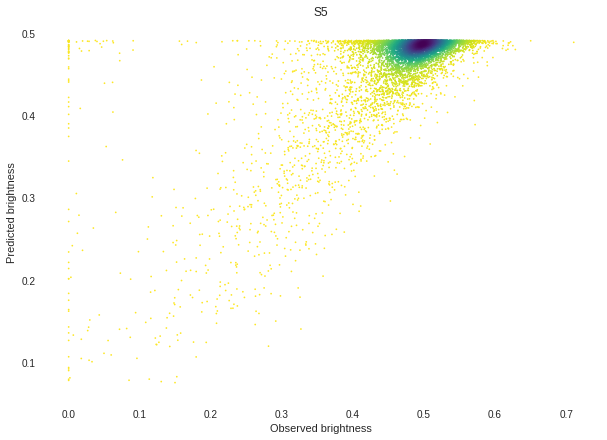

In [231]:
plt.figure(figsize = [10,7])
density_plot(true_1[:10000], predicted_1[:10000], chunk)

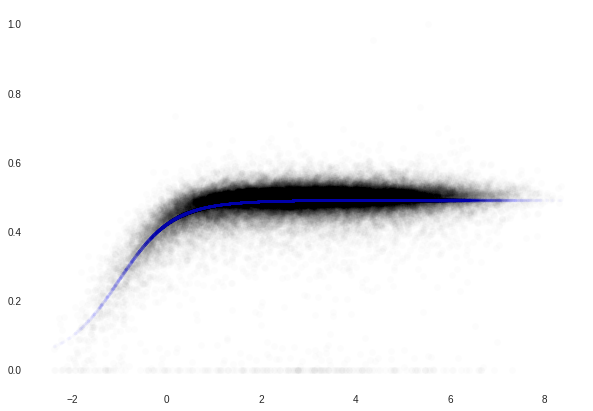

In [232]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_1, true_1, 'ok', alpha = 0.01)
plt.plot(fitness_potential_1, predicted_1, '.b', alpha = 0.01);

In [233]:
slope, intercept, R_1, p_value, std_err = stats.linregress(true_1, predicted_1)
R_1

0.60365760669106461

### 1.2. Double mutations features

In [234]:
data, labels = read_data_doubles(chunk)

true_2, predicted_2, fitness_potential_2 = train_NN(data, labels)

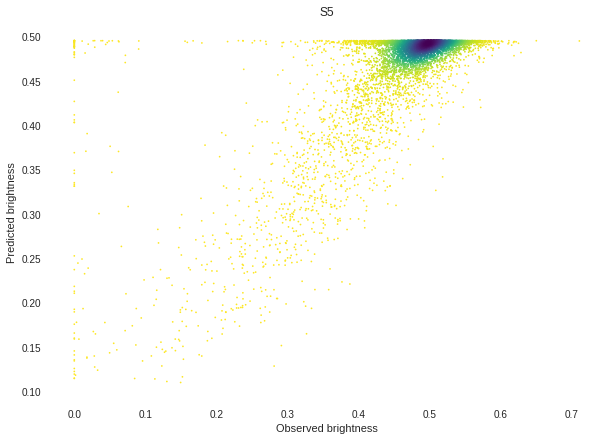

In [235]:
plt.figure(figsize = [10,7])
density_plot(true_2[:10000], predicted_2[:10000], chunk)

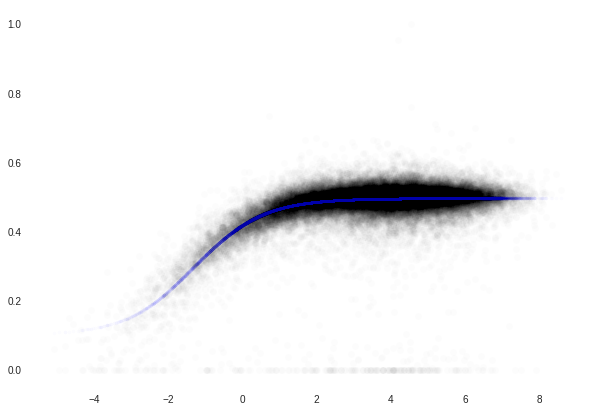

In [236]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_2, true_2, 'ok', alpha = 0.01)
plt.plot(fitness_potential_2, predicted_2, '.b', alpha = 0.01);

In [237]:
slope, intercept, R_2, p_value, std_err = stats.linregress(true_2, predicted_2)
R_2

0.63679820838938839

### 1.3. Triple mutations features

In [133]:
data, labels = read_data_triples(chunk)

true_3, predicted_3, fitness_potential_3 = train_NN(data, labels)

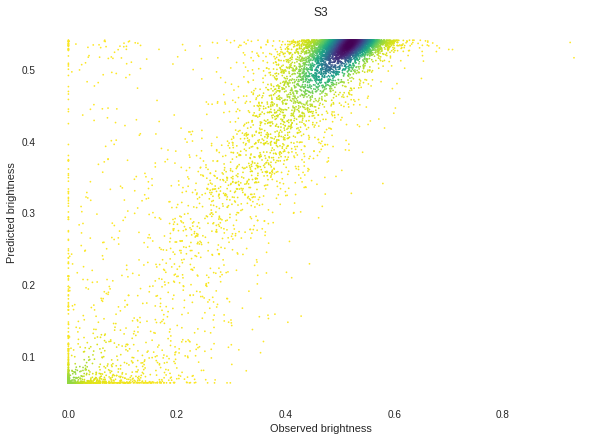

In [134]:
plt.figure(figsize = [10,7])
density_plot(true_3[:10000], predicted_3[:10000], chunk)

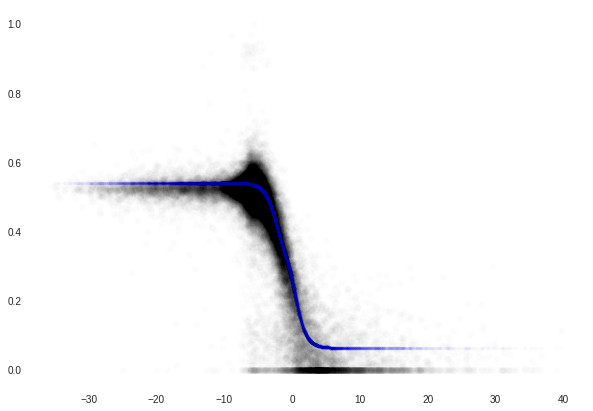

In [135]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_3, true_3, 'ok', alpha = 0.01)
plt.plot(fitness_potential_3, predicted_3, '.b', alpha = 0.01);

In [136]:
slope, intercept, R_3, p_value, std_err = stats.linregress(true_3, predicted_3)
R_3

0.91216356531309684

### 1.4. Multidimensional plotting

In [238]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np


# adding surfaces to subplots.

trace1 = go.Scatter3d(
    x=fitness_potential_1[:5000],
    y=fitness_potential_2[:5000],
    z=true_2[:5000],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.2
    )
)


layout = go.Layout(title = chunk,
    scene = dict(
                    xaxis = dict(
                        title='Fitness potential, singles'),
                    yaxis = dict(
                        title='Fitness potential, doubles'),
                    zaxis = dict(
                        title='Fitness',),),
                    width=1000,
                    margin=dict(
                    r=30, l=30,
                    b=30, t=40)
)

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig, filename='simple-3d-scatter')    